#  Dataset: House Prices - Advanced Regression Techniques

---

##  Objetivo del dataset
- **Meta principal**: **Predecir el precio de venta de una casa (`SalePrice`)** en la ciudad de Ames (Iowa, EE.UU.).
- **Cómo se logra**: mediante modelos de **regresión múltiple** u otros algoritmos de Machine Learning, usando como insumo las características de la casa (tamaño, materiales, condiciones, ubicación, etc.).

---

##  Pasos para llegar al objetivo
1. **Comprensión del problema**  
   - Variable dependiente: `SalePrice`.
   - Variables independientes: características estructurales, de ubicación, materiales y extras.

2. **Exploración de los datos (EDA)**  
   - Revisar registros, valores nulos, tipos de datos.
   - Generar estadísticas descriptivas y distribuciones.

3. **Limpieza de datos**  
   - Imputar o eliminar valores faltantes (`NA`).
   - Tratar valores atípicos.
   - Agrupar categorías poco frecuentes.

4. **Codificación de variables categóricas**  
   - Usar *One Hot Encoding* o *Label Encoding*.

5. **Escalamiento / Normalización**  
   - Aplicar sobre variables numéricas cuando el modelo lo requiera.

6. **Selección de variables relevantes**  
   - Usar correlaciones, ANOVA o técnicas de *feature selection*.

7. **Construcción del modelo**  
   - Empezar con **Regresión Lineal Múltiple**.
  

8. **Evaluación del modelo**  
- **RMSE (Root Mean Squared Error):** mide el error promedio, penaliza más los errores grandes.  
- **MAE (Mean Absolute Error):** error promedio absoluto entre lo real y lo predicho.  
- **R² (Coeficiente de determinación):** indica qué tan bien el modelo explica la variabilidad (0 a 1).  
- **Validación cruzada:** divide los datos en partes para entrenar y probar el modelo de forma más robusta.  


9. **Interpretación de resultados**  
   - Identificar qué variables influyen más en el precio de venta.

---

##  Resumen de variables principales
El dataset contiene **79 variables**. Algunos ejemplos clave:

- **Lote**
  - `MSSubClass`: tipo de vivienda (1 piso, 2 pisos, dúplex, PUD).  
  - `MSZoning`: zonificación (residencial, comercial, agrícola).  
  - `LotFrontage`: longitud de fachada.  
  - `LotArea`: área del terreno.  
  - `LotShape`: forma del lote (regular, irregular).  
  - `LandContour`: topografía (plano, pendiente, depresión).  
  - `Neighborhood`: barrio donde se ubica la casa.  

- **Construcción**
  - `BldgType`: tipo de construcción (unifamiliar, dúplex, townhouse).  
  - `HouseStyle`: estilo (1 piso, 2 pisos, split-level).  
  - `OverallQual`: calidad general (1 = muy mala, 10 = excelente).  
  - `OverallCond`: estado general de la vivienda.  
  - `YearBuilt`: año de construcción.  
  - `YearRemodAdd`: año de remodelación.  
  - `RoofStyle` / `RoofMatl`: tipo y material del techo.  
  - `Exterior1st` / `Exterior2nd`: material exterior.  

- **Sótano**
  - `BsmtQual`, `BsmtCond`: calidad y estado del sótano.  
  - `BsmtExposure`: exposición (ventanas, walkout).  
  - `TotalBsmtSF`: área total del sótano.  

- **Habitabilidad**
  - `GrLivArea`: área habitable sobre el nivel del suelo.  
  - `FullBath`, `HalfBath`: baños.  
  - `Bedroom`, `Kitchen`: habitaciones y cocinas.  
  - `TotRmsAbvGrd`: total de cuartos.  

- **Extras**
  - `Fireplaces`, `FireplaceQu`: chimeneas.  
  - `GarageType`, `GarageCars`, `GarageArea`: características del garaje.  
  - `WoodDeckSF`, `OpenPorchSF`, `PoolArea`, `Fence`: áreas exteriores y amenidades.  

- **Venta**
  - `MoSold`, `YrSold`: mes y año de venta.  
  - `SaleType`: tipo de venta (convencional, cash, VA loan).  
  - `SaleCondition`: condiciones de la venta (normal, familiar, parcial, etc.).  

- **Target**
  - `SalePrice`: precio de venta de la vivienda (variable a predecir).

---

##  En resumen
El dataset busca **explicar y predecir el precio de las casas** usando información estructural, de ubicación, calidad de materiales, extras y condiciones de venta.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

Dimensión de los datos:
Train: (1460, 81)
Test: (1459, 80)

Información general:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     

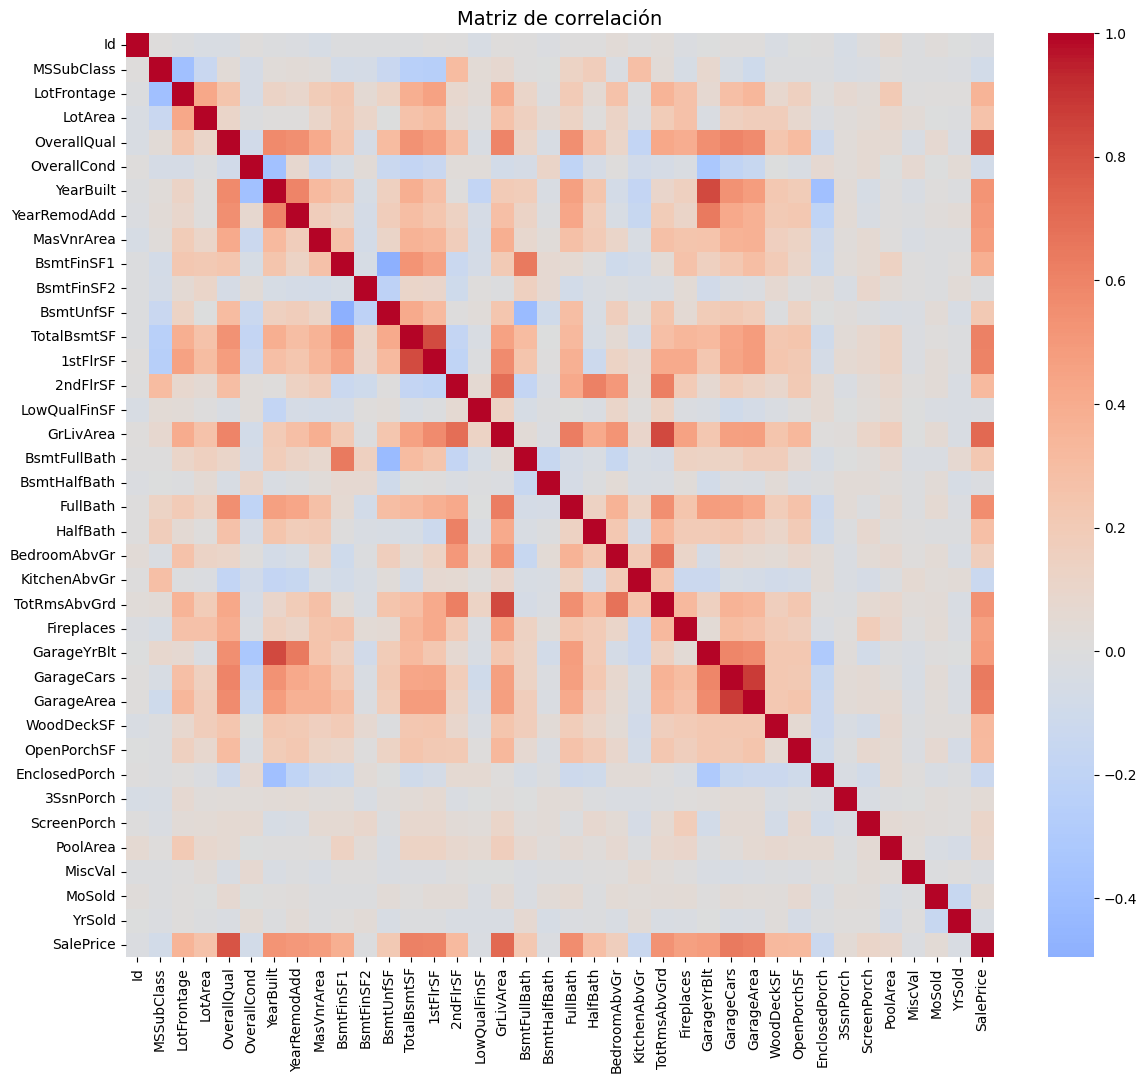

Estadísticas descriptivas:
                Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  ...  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000  ...   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726  ...   
std       1.112799    30.202904     20.645407   

C:\Users\ivans\AppData\Local\Temp\ipykernel_15808\272808147.py:43: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=corr_saleprice.values, y=corr_saleprice.index, palette="viridis")


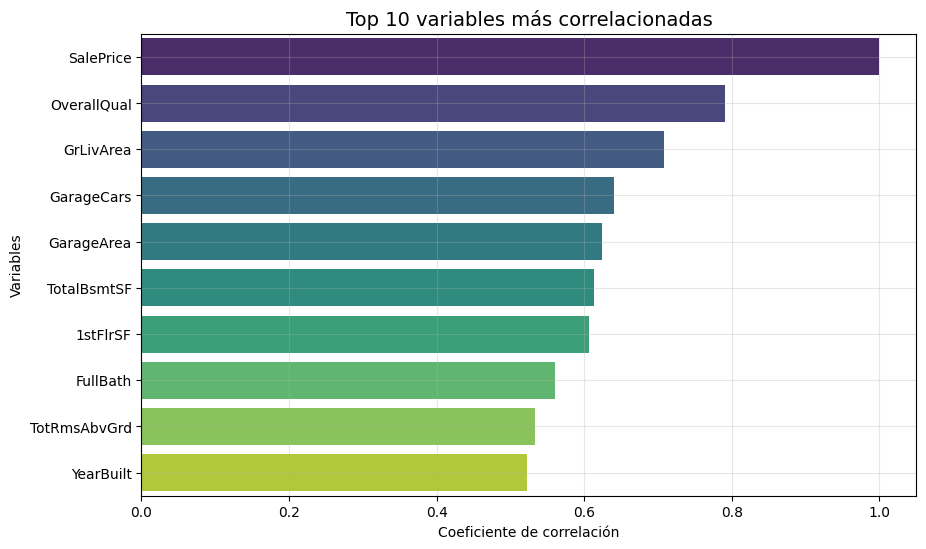

Variables más relevantes según ANOVA F-test:
Index(['OverallQual', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'Foundation',
       'TotalBsmtSF', 'HeatingQC', '1stFlrSF', 'GrLivArea', 'FullBath',
       'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars',
       'GarageArea'],
      dtype='object')


In [2]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

print("Dimensión de los datos:")
print(f"Train: {train.shape}")
print(f"Test: {test.shape}")


#EXPLORACIÓN DE LOS DATOS:
print("\nInformación general:")
train.info()

df_numerico = train.select_dtypes(include=["number"])
corr = df_numerico.corr()
plt.figure(figsize=(14, 12))
sns.heatmap(corr, cmap="coolwarm", center=0)
plt.title("Matriz de correlación", fontsize=14)
plt.show()

print("Estadísticas descriptivas:")
print(train.describe())


#LIMPIEZA DE DATOS:
#Rellenar faltantes numéricos con la mediana
num_cols = train.select_dtypes(include=["number"]).columns
train[num_cols] = train[num_cols].fillna(train[num_cols].median())

#Rellenar faltantes categóricos con la moda
cat_cols = train.select_dtypes(include=["object"]).columns
train[cat_cols] = train[cat_cols].fillna(train[cat_cols].mode().iloc[0])

#Eliminar outliers de SalePrice
if "SalePrice" in train.columns:
    limite = train["SalePrice"].quantile(0.99)
    train = train[train["SalePrice"] < limite]

print(f"\nNuevas dimensiones: {train.shape}")
print("Valores nulos restantes:", train.isnull().sum().sum())

corr_saleprice = corr["SalePrice"].sort_values(ascending=False).head(10)
plt.figure(figsize=(10,6))
sns.barplot(x=corr_saleprice.values, y=corr_saleprice.index, palette="viridis")
plt.title("Top 10 variables más correlacionadas", fontsize=14)
plt.xlabel("Coeficiente de correlación")
plt.ylabel("Variables")
plt.grid(alpha=0.3)
plt.show()


#CODIFICACIÓN DE VARIABLES CATEGÓRICAS:
for col in cat_cols:
    combined = pd.concat([train[col], test[col]], axis=0)
    codes, uniques = pd.factorize(combined)
    train[col] = codes[:len(train)]
    test[col] = codes[len(train):]


#ESCALAMIENTO / NORMALIZACIÓN:
scaler = StandardScaler()

#Excluir 'SalePrice' del escalado
num_cols_no_target = [col for col in num_cols if col != "SalePrice"]

#Escalar solo las variables numéricas predictoras
train[num_cols_no_target] = scaler.fit_transform(train[num_cols_no_target])

#Aplicar el mismo escalado al conjunto de prueba (solo columnas que existan)
cols_comunes = [col for col in num_cols_no_target if col in test.columns]
test[cols_comunes] = scaler.transform(test[cols_comunes])


#SELECCIÓN DE VARIABLES RELEVANTES:
X = train.drop(columns=["SalePrice"])
y = train["SalePrice"]

if X.shape[0] == 0:
    raise ValueError("El conjunto de entrenamiento está vacío.")

selector = SelectKBest(score_func=f_regression, k=15)
X_new = selector.fit_transform(X, y)
selected_features = X.columns[selector.get_support()]

print("Variables más relevantes según ANOVA F-test:")
print(selected_features)

In [3]:
#CONSTRUCCIÓN DEL MODELO:
X_train, X_test, y_train, y_test = train_test_split(X[selected_features], y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

#EVALUACIÓN DEL MODELO:
print("Evaluación del modelo:")
print(f"RMSE: {rmse:.2f}")
print(f"MAE: {mae:.2f}")
print(f"R²: {r2}")

Evaluación del modelo:
RMSE: 25855.34
MAE: 20149.68
R²: 0.8367854078810693


Variables más influyentes:
        Variable   Coeficiente
0    OverallQual  22742.483166
8      GrLivArea  15053.939958
13    GarageCars   7449.343498
2   YearRemodAdd   7327.580692
11    Fireplaces   7303.020465
1      YearBuilt   6971.073633
7       1stFlrSF   6577.822445
14    GarageArea   4137.301273
3     MasVnrArea   3105.114019
10  TotRmsAbvGrd   2907.057848


C:\Users\ivans\AppData\Local\Temp\ipykernel_15808\1060160109.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=coef_importance.head(10), x="Coeficiente", y="Variable", palette="magma")


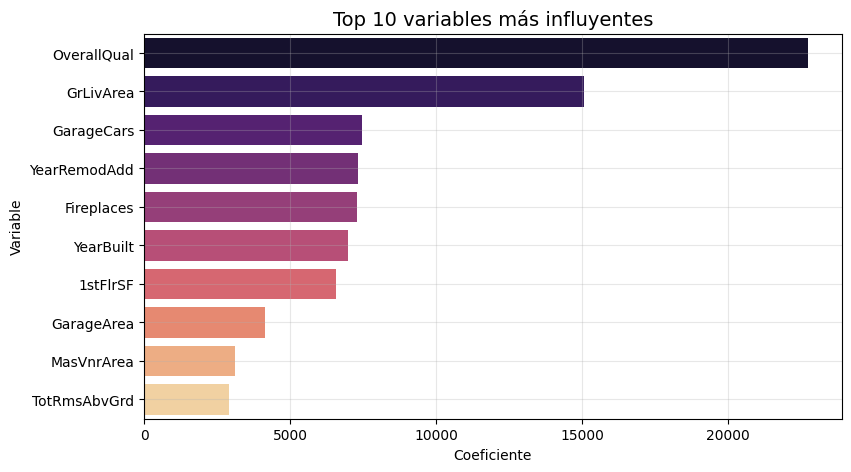

In [4]:
#INTERPRETACIÓN DE RESULTADOS:
coef_importance = pd.DataFrame({
    "Variable": selected_features,
    "Coeficiente": model.coef_
}).sort_values(by="Coeficiente", ascending=False)

print("Variables más influyentes:")
print(coef_importance.head(10))

plt.figure(figsize=(9,5))
sns.barplot(data=coef_importance.head(10), x="Coeficiente", y="Variable", palette="magma")
plt.title("Top 10 variables más influyentes", fontsize=14)
plt.grid(alpha=0.3)
plt.show()

In [91]:
#GENERAR ARCHIVO DE PREDICCIÓN:
#Seleccionar las mismas columnas relevantes del conjunto de prueba
test_selected = test[selected_features].copy()

#Rellenar valores faltantes con la media de cada columna numérica
test_selected = test_selected.fillna(test_selected.mean())

#Asegurar que no queden columnas no numéricas
test_selected = test_selected.select_dtypes(include=[np.number])

#Realizar predicciones
y_test_pred = model.predict(test_selected)

#Crear el DataFrame con los resultados
output = pd.DataFrame({
    "Id": test["Id"],
    "SalePrice": y_test_pred
})

#Guardar el archivo CSV
output.to_csv("predicciones.csv", index=False)
print("✅ Archivo 'predicciones.csv' generado con éxito")

✅ Archivo 'predicciones.csv' generado con éxito
